## Probability and Statistics II

Descriptive statistics: from a bunch of numbers, you extract more numbers to describe the data

#### Monte Carlo Integration

$\int{f(x)p(x)dx)}$ con $\int{p(x)dx} = 1$, provided that you kno how to SAMPLE values from p, allora any integral com quello prima può essere approssimato a $\sim\frac{1}{N} \Sigma f(x_{i})$

Se faccio questo conto, il mio ESTIMATORE cambia ogni volta, di poco, ma è sempre vicino al valore reale. Sono UNBIASED, spoiler.

#### Descriptive Statistics

Voglio stimare h dato modello f.

Media aritmetica: sai la definizione. E' la MC estimate quando f è l'identità ( vedi sopra )

Valore di aspettazione $\mu = E(x) = <x> = \int{x h(x) dx}$, integrato su R. Attenzione, l'integrale di x h(x) potrebbe non convergere!

Mediana: quel valore che divide il tuo sample a metà. Ha a che vedere con ORDER OF SAMPLES -> è molto più resilient agli outliers! ( tradotto, se fai una media e hai un valore enorme si sballa il conto. se hai la mediana, il risultato non cambia )

Quanto sono "spread" i dati?

Mean Absolute Deviation (MAD): $\frac{1}{N} \Sigma |x_{i} - \mu|$

Variance: $\sigma^{2} = \frac{1}{N} \Sigma (x_{i} - \mu)^{2}$

STD Deviation: è la radice della varianza.

Median Absolute Deviation: non si usa ^^

PERCENTILES // QUANTILES: la mediana è il 50% quantile. Vedi appunti.


Hai una distribuzione NON gaussiana e vuoi caratterizzarla con SOLO due numeri?

Usi la MEDIANA e la SIGMA G: interquantile range. La sigmaG è molto simile alla sigma della distribuzione, se fosse gaussiana. MORE ON THAT LATER


La MODA è il valore più probabile, dato dal picco della distribuzione. Chiaramente, a seconda della forma della distribuzione non trovi solo un valore o meno.

##### NON USARE scipy.stat.mods: è pericoloso

Mean: dov'è la distribuzione
Sigma: quanto è divisa
Skewness:
    Negative Skewness: short tails
    Positive Skewness: long tails
Kurtosis: quanto è "piatta" (?)

#### Sample vs. Population statistics

Tutto quel che ho visto fin qui è relativo alla statistica che prendo relativamente ai dati.

Questi sono ESTIMATOR per la POPOLAZIONE che sta dietro ai dati.

SAMPLE STATISTICS: arrivano dai dati che hai
POPULATION STATISTICS: arrivano sapendo la pdf

$\mu = \int{x h(x) dx}$ mentre $<x> = \frac{1}{N}\Sigma x_{i}$

La sample mean $<x>$ è un ESTIMATOR di $\mu$

La population variance NON E' la sample variance!

Se faccio diventare grande il sample, posso stare più tranquillo.

#### Uncertainty of Sample Statistics

Quanto sono accurate le mie misure? 

Ho calcoltato $<x>$ ed s: che uncertainty c'è?

Attenzione: la s è la WIDTH ESTIMATE della underlying distribution. NON E' l'errore della media! 

Vedi jupyter del prof per le varie definizioni. Standard Error of the Mean e del Quantile D:

ESERCIZIO A CASA

    Generate some data
    Calcola $<x>$ ed s
    Fallo tante volte
    Estimate the errors
    Compare with the expressions provided above

#### Univariate Distributions ( and intro to scipy.stats )

Cerco di organizzare i dati in PARAMETRIZED fashion: "oh, this looks like a gaussian!"

UNIFORM DISTRIBUTION: vedi notebook. Due parametri, $\mu$, W. 
    p(x|$\mu$,W) -> distU = scipy.stats.uniform(-1,2)
    
GAUSSIAN DISTRIBUTION: p(x|$\mu, \sigma$)
        
    La adoro per 1: teorema del limite centrale e 2: la convoluzione di gaussiane dà ancora una gaussiana.
    La cdf di una gaussiana si chiama ERF
    Ci sono i gaussian confidence levels
    
LOG NORMAL DISTRIBUTION: in astrofisica capita di non sapere la "scale" of an object, quindi ha poco senso usare una scala lineare per descrivere i tuoi dati.

CHI-SQUARE DISTRIBUTION: hai dati distribuiti in modo gaussiano. Fai quello che fa nel notebook? Allora Q è distribuita come ti fa vedere nel notebook. Se Q è il tuo estimatore e sai com'è distribuito, allora.. (?)

POISSON DISTIRBUTION: solitamente domina i processi fisici. Ha UN parametro, $\mu$, ed è la probabilità che k eventi accadano entro tot tempo quando la media è $\mu$: p(k|$\mu$). Si chiama anche LAW OF SMALL NUMBERS or LAW OF RARE EVENTS
    
    pmf: probability MASS function. è la pdf discretizzata!
    
STUDENT'S t DISTRIBUTION: vedi notebook. Se hai processo con quella forma funzionale, la usi.
Fun fact, il tipo all'origine di questa distribuzione era interessato in statistics and brewery

Time to code!

In [2]:
### ESERCIZIO 1
# Using MC integration, verifica che l'integrale di x^3 per exp(-x^2/2sigma^2) è 2 sigma^4

# -> il risultato converge col numero di samples N? che succede all'errore?
# -> com'è distribuito il risultato by a given N? Prova a fittarlo con una parametrica
# -> come cambia con N?

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

s = 0.5

def f(x): 
    y = 0.5*np.sqrt(2*np.pi*s**2) * x**3
    return y

def alg(N):
    sample = np.random.normal(0, s, N)
    sample = np.abs(sample)
    integral = np.sum(f(sample))/N
    #print(integral, 2*s**4)
    return sample, integral

i = 0
L = 100
#fig, axs = plt.subplots(3,3)
#fig.tight_layout()
#ax = axs.flatten()

num = np.logspace(1,8,L,dtype=int)
res = np.zeros(L)
sam = np.empty(L,dtype=np.ndarray)

for N in num:
    sam[i], res[i] = alg(N)
    #print(N, alg(N))
#    ax[i].hist(sam[i], bins=50)
#    ax[i].set_title(N)
    #print(i)
    i+=1
    
#plt.show()

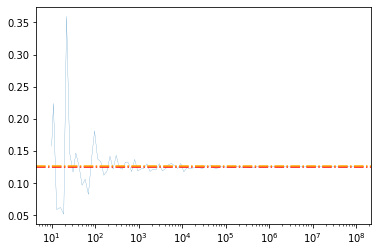

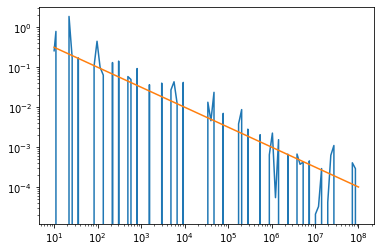

In [3]:
plt.show()    
plt.plot(num,res,ls='-', lw=0.2)#, marker='*')
plt.xscale('log')
plt.axhline(np.median(res),c='red',ls='-.')
plt.axhline(np.mean(res),c='orange',ls='-.')

plt.show()
true = 2*s**4
plt.plot(num, (res-true)/true)
plt.plot(num, num**(-0.5))
plt.xscale('log')
plt.yscale('log')

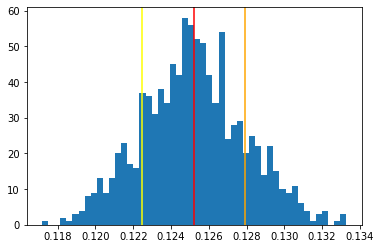

In [9]:
def Sampling_Evolution(nImg, path):
    import os
    import imageio
    
    Filename = np.empty(nImg, dtype='U100')
    N = np.logspace(1,6,nImg, dtype=int)
    i = 0
    for n in N:
        sample, integral = alg(n)
        plt.hist(sample, bins='auto')
        plt.title(n)
        filename = path+str(i)+'.jpg'
        plt.savefig(filename)
        Filename[i] = filename
        i+=1
        plt.clf()
        
    with imageio.get_writer(path +'evo.gif', mode='I') as writer:
        for filename in Filename:
            #print(filename)
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in Filename:
        os.remove(filename)
    return

def Multiple_Samplings( N, cycles, path ):
    #import os
    #import imageio
    
    II = np.empty(cycles)
    
    #Filename = np.empty(cycles, dtype='U100')
    for i in range(cycles):
        sample, integral = alg(N)
        #plt.hist(sample, bins='auto')
        #plt.title('N = '+str(N)+', '+str(cycles)+' cycles')
        #filename = path+str(i)+'.jpg'
        #plt.savefig(filename)
        #Filename[i] = filename
        II[i] = integral
        
        #plt.clf()
        
    #with imageio.get_writer(path +'cycle.gif', mode='I') as writer:
    #    for filename in Filename:
            #print(filename)
    #        image = imageio.imread(filename)
    #        writer.append_data(image)
    #for filename in Filename:
    #    os.remove(filename)

    return II

path = '/home/freddycch/ASTROSTATISTICS/L03/'    
#Sampling_Evolution(100, path)
II = Multiple_Samplings(10000, 1000, path)
plt.hist(II, bins=50)
mu = np.mean(II)
rms = np.std(II)
plt.axvline(mu, c='r')
plt.axvline(mu-rms, c='yellow')
plt.axvline(mu+rms, c='orange')

from scipy.optimize import curve_fit

par, err = curve_fit(II)

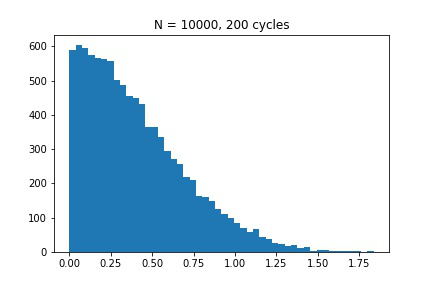

In [5]:
from IPython.display import Image
# Image(path+'evo.gif')

Image(path+'cycle.gif')

In [6]:
### ESERCIZIO 2
# Quanti vengono uccisi da horse kicks in the Prussian Army? <3
# plotta la pdf risultante. OCCHIO alla normalizzazione
# A cosa sembra? Fitta a mano, pensando a media e varianza.